<a href="https://colab.research.google.com/github/marcinwolter/DeepLearning_2020/blob/main/hyperopt_optuna_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
#Hyperopt demo - minimize x^2 function

from hyperopt import fmin, tpe, rand, hp, STATUS_OK, Trials
import matplotlib.pyplot as plt

fspace = {
    'x': hp.uniform('x', -5, 5)
}

def f(params):
    x = params['x']
    val = x**2
    return {'loss': val, 'status': STATUS_OK}
    
trials = Trials()

# possible algos: algo= (tpe.suggest, rand.suggest)
best = fmin(fn=f, space=fspace, algo=rand.suggest,  max_evals=1000, trials=trials)
print('best:', best)
print(' trials:')

for trial in trials.trials[:2]:
    print(trial)




100%|██████████| 1000/1000 [00:01<00:00, 871.60it/s, best loss: 0.0001815403824958267]
best: {'x': 0.013473692236941837}
 trials:
{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 4.748114832641314, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [0]}, 'vals': {'x': [-2.17901694179768]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 11, 30, 18, 48, 33, 545000), 'refresh_time': datetime.datetime(2020, 11, 30, 18, 48, 33, 545000)}
{'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.4190786924431923, 'status': 'ok'}, 'misc': {'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [1]}, 'vals': {'x': [0.647362875397711]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 11, 30, 18, 48, 33, 546000), 'refresh_time': datetime.datetime(2020, 11, 30, 18, 48, 33, 546000)}


In [82]:
print(trials.trials)

[{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 4.748114832641314, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [0]}, 'vals': {'x': [-2.17901694179768]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 11, 30, 18, 48, 33, 545000), 'refresh_time': datetime.datetime(2020, 11, 30, 18, 48, 33, 545000)}, {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.4190786924431923, 'status': 'ok'}, 'misc': {'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [1]}, 'vals': {'x': [0.647362875397711]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 11, 30, 18, 48, 33, 546000), 'refresh_time': datetime.datetime(2020, 11, 30, 18, 48, 33, 546000)}, {'state': 2, 'tid': 2, 'spec': None, 'result': {'loss': 11.589653067121366, 'status': 'ok'}, 'misc': {'tid': 2, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'work

Text(0, 0.5, '$x$')

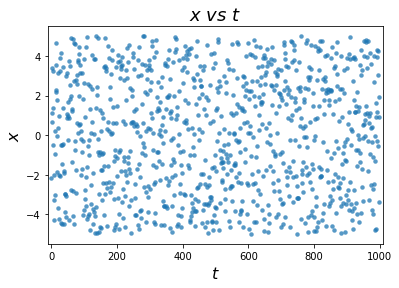

In [83]:
f, ax = plt.subplots(1)

xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['x'] for t in trials.trials]

ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$x$ $vs$ $t$ ', fontsize=18)
ax.set_xlabel('$t$', fontsize=16)
ax.set_ylabel('$x$', fontsize=16)

Text(0, 0.5, '$val$')

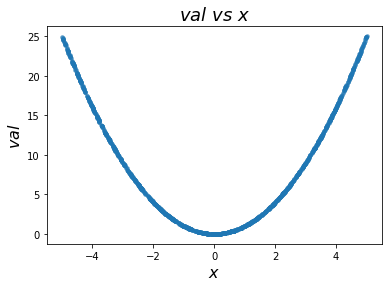

In [84]:
f, ax = plt.subplots(1)

xs = [t['misc']['vals']['x'] for t in trials.trials]
ys = [t['result']['loss'] for t in trials.trials]

ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$val$ $vs$ $x$ ', fontsize=18)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$val$', fontsize=16)

# **Optuna demo**

In [85]:
# install optuna
! pip install optuna

In [86]:


import optuna

def objective(trial):
    x = trial.suggest_uniform('x', -10, 10)
    y = trial.suggest_uniform('y', -10, 10)


    # Handle pruning based on the intermediate value.
    if trial.should_prune():
            raise optuna.TrialPruned()  

    return (x - 2) ** 2 + (y-1) ** 4

study = optuna.create_study()
study = optuna.create_study(direction='minimize', pruner=optuna.pruners.MedianPruner(), sampler=optuna.samplers.TPESampler() )

study.optimize(objective, n_trials=100)

study.best_params  # E.g. {'x': 1.7867602526129278, 'y': 1.0872101494664252}

[I 2020-11-30 18:48:37,858] A new study created in memory with name: no-name-7e8068e2-5254-4e41-b2f4-4c5c76a05de6
[I 2020-11-30 18:48:37,867] A new study created in memory with name: no-name-1a35dec0-2d3f-4e58-a7cf-e586df9d8acf
[I 2020-11-30 18:48:37,869] Trial 0 finished with value: 2240.019735361758 and parameters: {'x': -6.217157341691588, 'y': 7.827156358323354}. Best is trial 0 with value: 2240.019735361758.
[I 2020-11-30 18:48:37,874] Trial 1 finished with value: 13345.447583120944 and parameters: {'x': 5.038471080454624, 'y': -9.746279930475243}. Best is trial 0 with value: 2240.019735361758.
[I 2020-11-30 18:48:37,876] Trial 2 finished with value: 5048.513629796949 and parameters: {'x': -4.066121035437518, 'y': 9.413885719509743}. Best is trial 0 with value: 2240.019735361758.
[I 2020-11-30 18:48:37,878] Trial 3 finished with value: 83.66082351744792 and parameters: {'x': 5.067384589169388, 'y': 3.935465650889361}. Best is trial 3 with value: 83.66082351744792.
[I 2020-11-30 18

{'x': 2.011340298373206, 'y': 0.8686633534372447}

## Visualizing the Optimization History

In [87]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study)

## Visualizing High-dimensional Parameter Relationships

In [88]:
plot_parallel_coordinate(study, params=['x', 'y'])

## Visualizing Parameter Relationships

In [89]:
from optuna.visualization import plot_contour

plot_contour(study)

### Selecting Parameters to Visualize

In [90]:
plot_contour(study, params=['x', 'y'])

## Visualizing Individual Parameters

In [91]:
from optuna.visualization import plot_slice

plot_slice(study)

### Selecting Parameters to Visualize

In [92]:
plot_slice(study, params=['x', 'y'])

## Visualizing Parameter Importances

In [93]:
from optuna.visualization import plot_param_importances

plot_param_importances(study)